<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Learning Objectives</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model Selection</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Baseline Model</a></span></li></ul></li><li><span><a href="#Decisions,-Decisions,-Decisions..." data-toc-modified-id="Decisions,-Decisions,-Decisions...-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Decisions, Decisions, Decisions...</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Distribution-Transformations" data-toc-modified-id="Distribution-Transformations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Distribution Transformations</a></span><ul class="toc-item"><li><span><a href="#Log-Scaling" data-toc-modified-id="Log-Scaling-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Log Scaling</a></span></li><li><span><a href="#Build-model" data-toc-modified-id="Build-model-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Build model</a></span></li><li><span><a href="#Check-distribution-of-target" data-toc-modified-id="Check-distribution-of-target-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Check distribution of target</a></span></li><li><span><a href="#Build-model-with-log-scaled-target" data-toc-modified-id="Build-model-with-log-scaled-target-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Build model with log-scaled target</a></span></li></ul></li><li><span><a href="#Binning" data-toc-modified-id="Binning-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Binning</a></span><ul class="toc-item"><li><span><a href="#Volatile-Acidity" data-toc-modified-id="Volatile-Acidity-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Volatile Acidity</a></span></li><li><span><a href="#$\bf{SO_2}$" data-toc-modified-id="$\bf{SO_2}$-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>$\bf{SO_2}$</a></span></li></ul></li><li><span><a href="#Products-of-Features" data-toc-modified-id="Products-of-Features-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Products of Features</a></span></li><li><span><a href="#Polynomial-Features" data-toc-modified-id="Polynomial-Features-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Polynomial Features</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Exercise</a></span></li></ul></div>

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import sklearn.metrics as metrics
import statsmodels.api as sm
from scipy import stats

## Learning Objectives

- Use correlations and other algorithms to inform feature selection
- Create new features for use in modeling
    - Use binning to turn numerical into categorical features
    - Use `PolynomialFeatures` to build compound features

## Model Selection

Let's imagine that I'm going to try to predict wine quality based on the other features.

In [4]:
wine = pd.read_csv('data/wine.csv')

In [5]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


### Baseline Model

Your baseline model for regression models takes the mean of the target as the prediction result for every observation (row) of data in your features/predictors.

Enter `DummyRegressor`!

In [7]:
X = wine.drop('quality', axis=1)
y = wine.quality

In [6]:
# Instantiate

dummy = DummyRegressor()

In [8]:
dummy.fit(X,y)

DummyRegressor()

In [10]:
dummy.score(X,y)

0.0

In [ ]:
# Score it!


In [11]:
# Predict!
dummy_pred = dummy.predict(X)

In [12]:
# RMSE
metrics.mean_squared_error(y, dummy_pred, squared=False)

0.8731880644450568

## Decisions, Decisions, Decisions...

Now: Which columns (predictors) should I choose? 

There are 12 predictors I could choose from. For each of these predictors, I could either use it or not use it in my model, which means that there are $2^{12} = 4096$ _different_ models I could construct! Well, okay, one of these is the "empty model" with no predictors in it. But there are still 4095 models from which I can choose.

How can I decide which predictors to use in my model?

We'll explore a few methods in the sections below.

## Correlation

Our first attempt might be just see which features are _correlated_ with the target to make a prediction.

We can use the correlation metric in making a decision.

In [13]:
# Use the .corr() DataFrame method to find out about the
# correlation values between all pairs of variables!

wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


<AxesSubplot:>

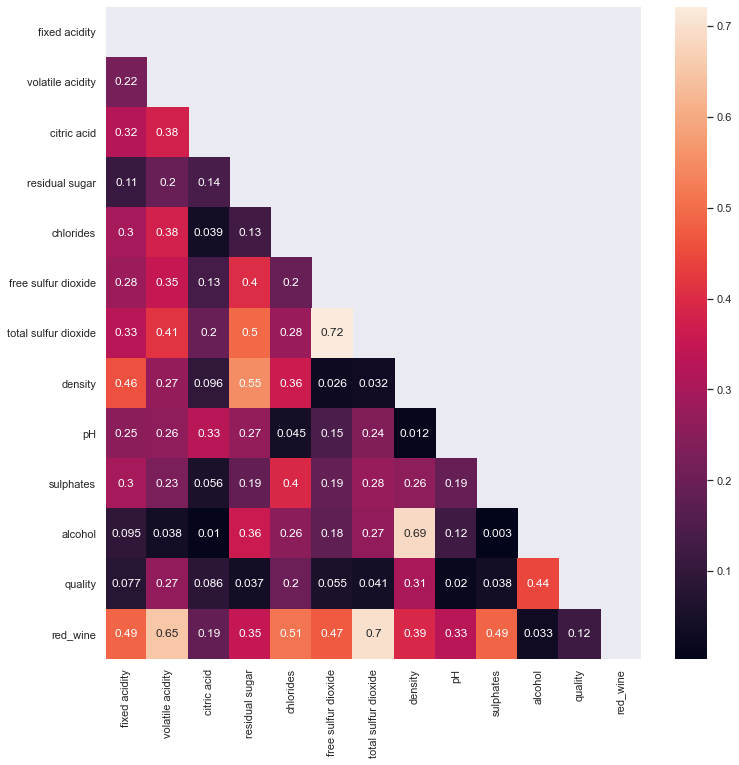

In [16]:
sns.set(rc={'figure.figsize':(12, 12)})

# Use the .heatmap function to depict the relationships visually!
mask = np.triu(np.ones_like(wine.corr()))

sns.heatmap(abs(wine.corr()), mask=mask, annot=True)

In [17]:
# Let's look at the correlations with 'quality'
# (our dependent variable) in particular.

wine_corrs = wine.corr()['quality'].map(abs).sort_values(ascending=False)
wine_corrs

quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
chlorides               0.200666
red_wine                0.119323
citric acid             0.085532
fixed acidity           0.076743
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64

It looks like we can see the features have different correlations with the target. The larger the correlation, the more we'd expect these features to be better predictors.

Let's try using only a subset of the strongest correlated features to make our model.

In [20]:
# Let's choose 'alcohol' and 'density'.
wine_preds = wine[['alcohol','density']]
wine_target = wine.quality

In [21]:
# ols
model = sm.OLS(wine_target, sm.add_constant(wine_preds)).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     798.7
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          7.48e-311
Time:                        09:16:08   Log-Likelihood:                -7623.4
No. Observations:                6497   AIC:                         1.525e+04
Df Residuals:                    6494   BIC:                         1.527e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8095      4.512      0.623      0.533      -6.035      11.654
alcohol        0.3246      0.011     28.991      0.000       0.303       0.347
density       -0.3991      4.454     -0.090      0.929      -9.130       8.332
==============================================================================
Omnibus:                      123.912   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.761
Skew:                           0.031   Prob(JB):                     6.47e-57
Kurtosis:                       3.976   Cond. No.                     6.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
fsm2 = sm.OLS(wine_target, sm.add_constant(wine.drop('quality', axis=1))).fit()

In [26]:
fsm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     227.8
Date:                Tue, 19 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:18:44   Log-Likelihood:                -7195.2
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6484   BIC:                         1.450e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  104.3904     14.105      7.401      0.000      76.741     132.040
fixed acidity            0.0851      0.016      5.396      0.000       0.054       0.116
volatile acidity        -1.4924      0.081    -18.345      0.000      -1.652      -1.333
citric acid             -0.0626      0.080     -0.786      0.432      -0.219       0.094
residual sugar           0.0624      0.006     10.522      0.000       0.051       0.074
chlorides               -0.7573      0.334     -2.264      0.024      -1.413      -0.102
free sulfur dioxide      0.0049      0.001      6.443      0.000       0.003       0.006
total sulfur dioxide    -0.0014      0.000     -4.333      0.000      -0.002      -0.001
density               -103.9096     14.336     -7.248      0.000    -132.013     -75.806
pH                       0.4988      0.091      5.506      0.000       0.321       0.676
sulphates                0.7217      0.076      9.466      0.000       0.572       0.871
alcohol                  0.2227      0.018     12.320      0.000       0.187       0.258
red_wine                 0.3613      0.057      6.367      0.000       0.250       0.473
==============================================================================
Omnibus:                      140.992   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.985
Skew:                           0.016   Prob(JB):                     6.59e-69
Kurtosis:                       4.077   Cond. No.                     2.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Feature Engineering

> Domain knowledge can be helpful here! 🧠

In practice this aspect of data preparation can constitute a huge part of the data scientist's work. As we move into data modeling, much of the goal will be a matter of finding––**or creating**––features that are predictive of the targets we are trying to model.

There are infinitely many ways of transforming and combining a starting set of features. Good data scientists will have a nose for which engineering operations will be likely to yield fruit and for which operations won't. And part of the game here may be getting someone else on your team who understands what the data represent better than you!

Let's try this ourselves! Since I don't know much about wine, I'm really just guessing.

In [27]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


## Distribution Transformations

### Log Scaling

Linear regression can work better if the predictor and target are normally distributed. 

**Log-scaling** can be a good tool to make *right-skewed* data more normal.

(For *left-skewed* data, which is rarer, we can try transforming our data by raising it to an exponent greater than 1.)

Suppose e.g. a kde plot of my predictor $X$ looks like this:

![original](./images/skewplot.png)

In that case, the kde plot of a log-transformed version of $X$ could look like this:

![log](./images/logplot.png)

Let's set up a problem like this.

In [28]:
diamonds = sns.load_dataset('diamonds')

In [29]:
X = diamonds.select_dtypes(include=float)
y = diamonds['price']

### Build model

In [30]:
sm.OLS(endog=y, exog=X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                          1.120e+05
Date:                Tue, 19 Sep 2023   Prob (F-statistic):                        0.00
Time:                        09:20:39   Log-Likelihood:                     -4.7196e+05
No. Observations:               53940   AIC:                                  9.439e+05
Df Residuals:                   53934   BIC:                                  9.440e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       9533.9516     59.317    160.730      0.000    9417.691    9650.213
depth         28.2911      2.416     11.712      0.000      23.556      33.026
table        -18.8220      2.558     -7.358      0.000     -23.836     -13.808
x           -522.6300     40.351    -12.952      0.000    -601.718    -443.542
y            182.3295     25.907      7.038      0.000     131.552     233.107
z           -676.7502     42.361    -15.976      0.000    -759.778    -593.722
==============================================================================
Omnibus:                    14555.339   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           287131.956
Skew:                           0.809   Prob(JB):                         0.00
Kurtosis:                      14.186   Cond. No.                         829.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check distribution of target

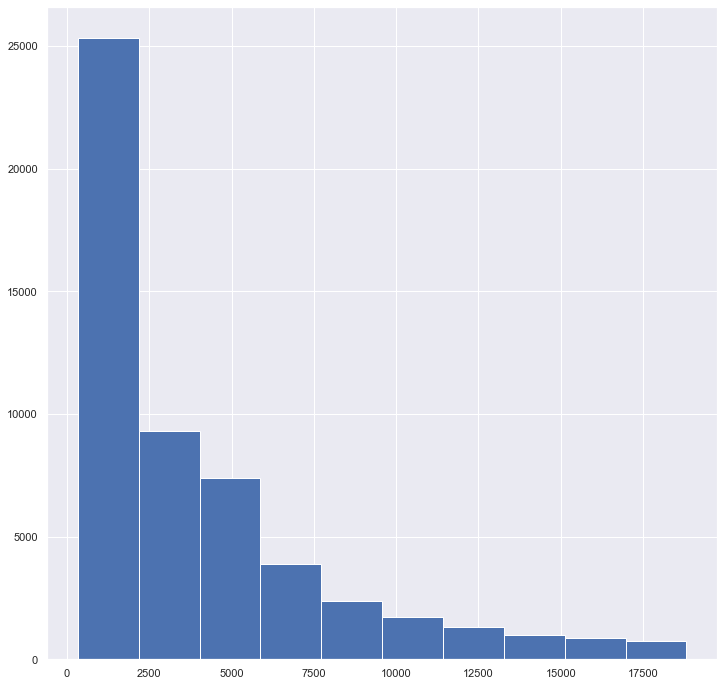

In [31]:
y.hist();

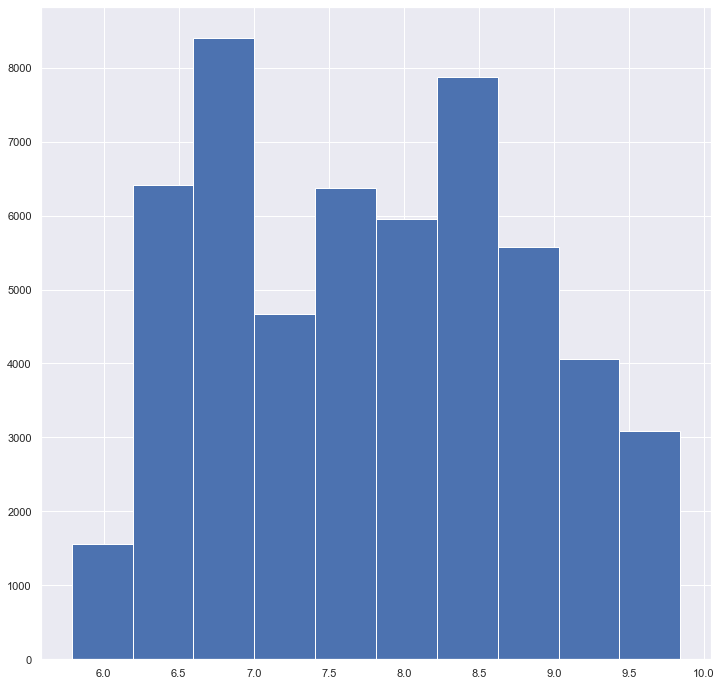

In [32]:
y_scld = np.log(y)
y_scld.hist();

### Build model with log-scaled target

In [33]:
model_diam = sm.OLS(y_scld, X).fit()
model_diam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          7.072e+06
Date:                Tue, 19 Sep 2023   Prob (F-statistic):                        0.00
Time:                        09:21:06   Log-Likelihood:                         -7833.4
No. Observations:               53940   AIC:                                  1.568e+04
Df Residuals:                   53934   BIC:                                  1.573e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat         -0.7522      0.011    -69.197      0.000      -0.774      -0.731
depth          0.0319      0.000     72.131      0.000       0.031       0.033
table         -0.0062      0.000    -13.212      0.000      -0.007      -0.005
x              1.1098      0.007    150.072      0.000       1.095       1.124
y              0.0506      0.005     10.660      0.000       0.041       0.060
z              0.0340      0.008      4.377      0.000       0.019       0.049
==============================================================================
Omnibus:                    50951.621   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         28055158.482
Skew:                           3.704   Prob(JB):                         0.00
Kurtosis:                     114.481   Cond. No.                         829.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

But with this transformed target, how do I now interpret my LR coefficients?

Before the transformation, I would have said that a one-unit increase in, say, depth results on average in a 0.0319 increase in price. But what I need to say now is that a one-unit increase in depth results on average in a 0.0319 increase *in the logarithm of price*, i.e. an increase in price by a factor of $e^{0.0319}$.

In [34]:
print(f"""
A one-unit increase in the depth variable corresponds
to an increase in price by a factor of {round(np.exp(0.0319), 3)},
or {round(np.exp(0.0319) - 1, 3)}%.
""")


A one-unit increase in the depth variable corresponds
to an increase in price by a factor of 1.032,
or 0.032%.



## Binning

To start we'll look at some `seaborn` Pair Plots. We'll do this in two halves so that we can see things a bit more clearly:

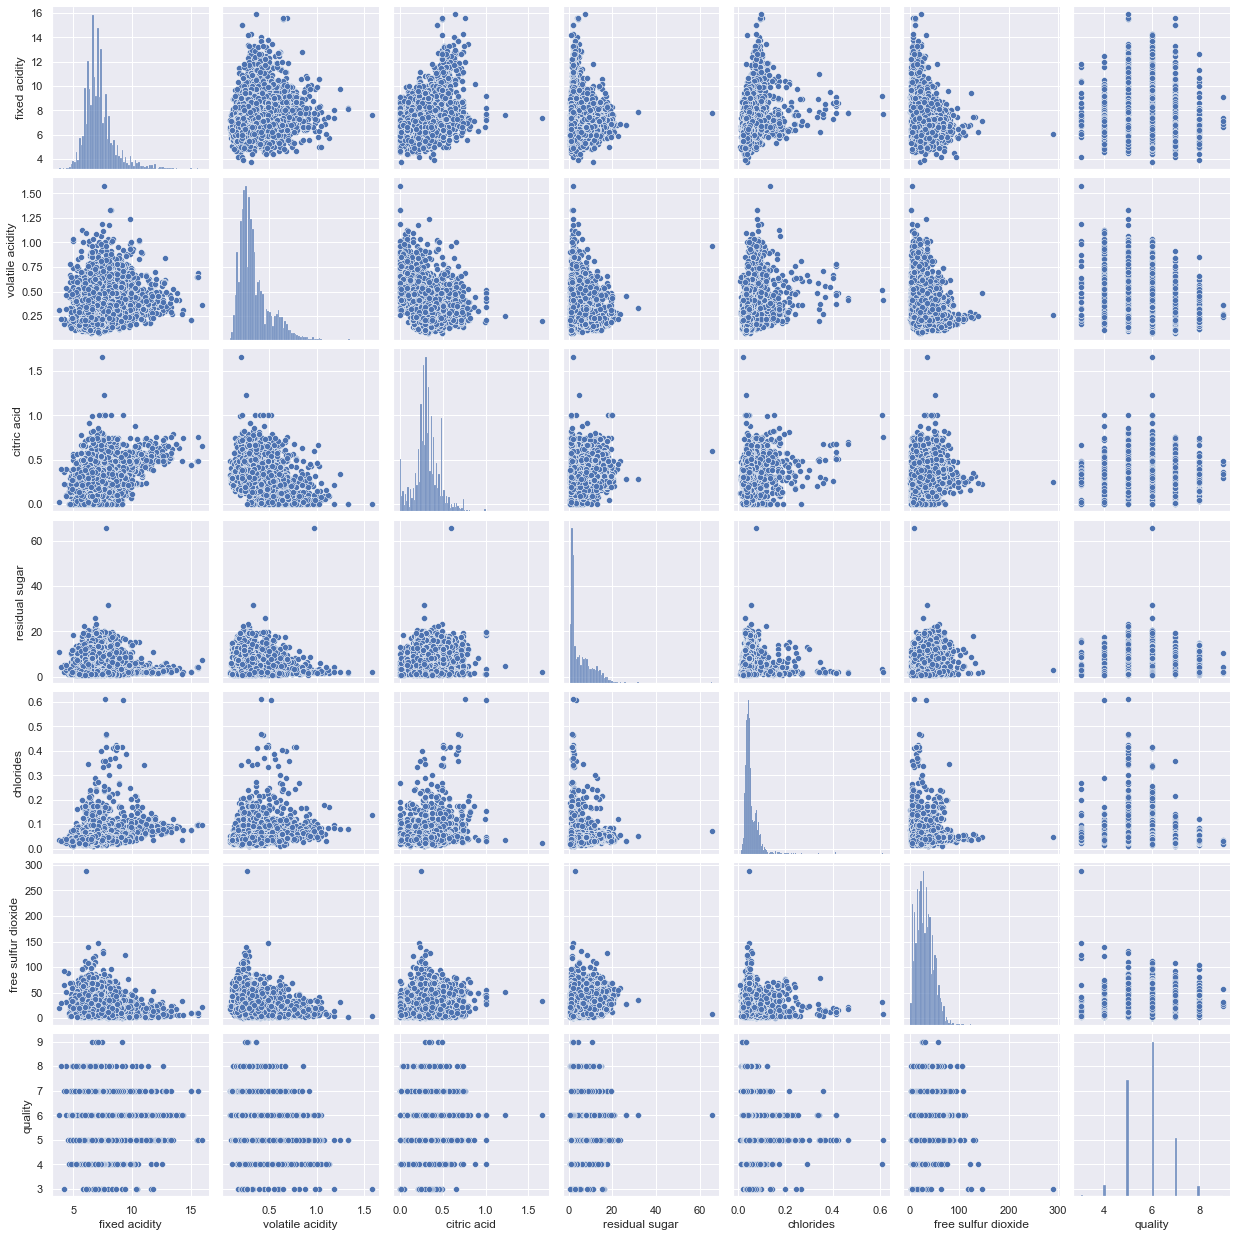

In [35]:
# This will show the first six predictors and 'quality'
columns = [True if j < 6 or j == 11 else False for j in range(13)]

sns.pairplot(data=wine.iloc[:, columns]);

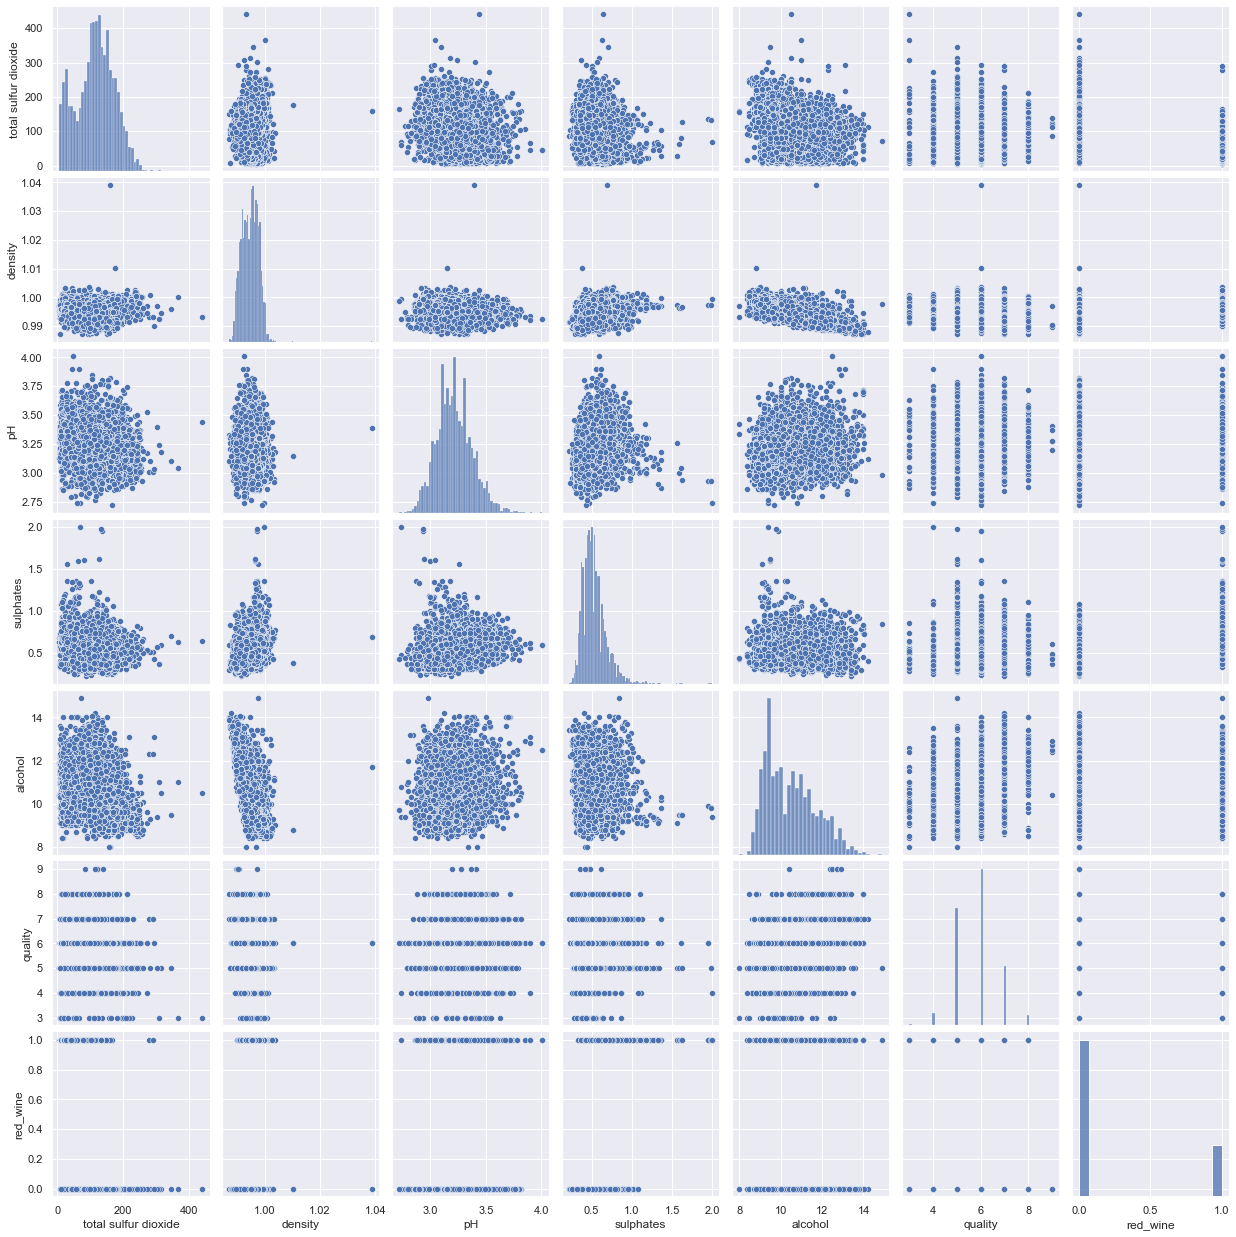

In [36]:
sns.pairplot(data=wine.iloc[:, 6:]);

### Volatile Acidity

Let's look at the distribution of the volatile acidity feature:

<AxesSubplot:>

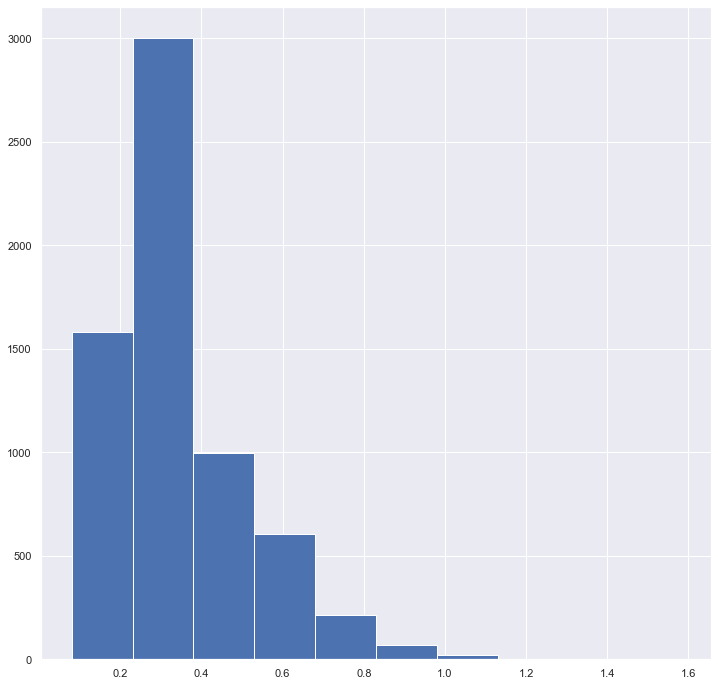

In [37]:
# Default Histogram
wine['volatile acidity'].hist()

Suppose we add more bins:

<AxesSubplot:>

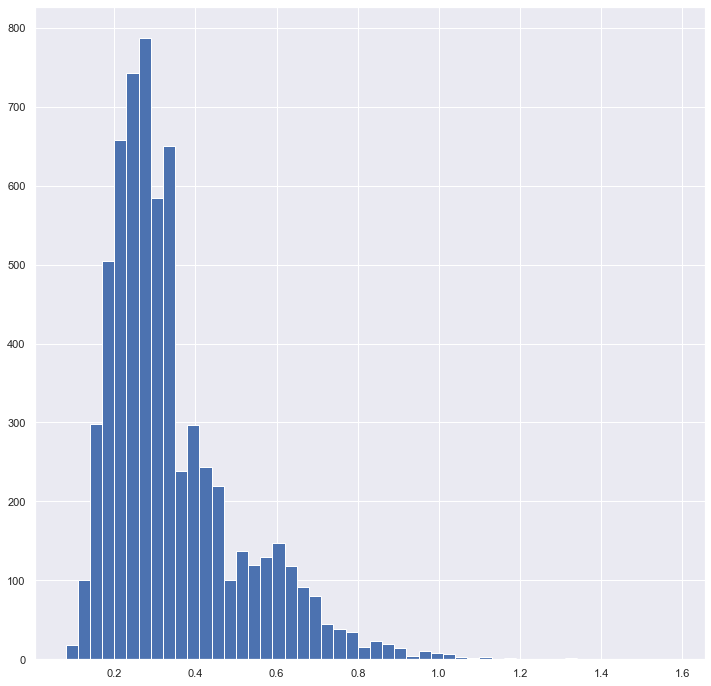

In [38]:
# more bins
wine['volatile acidity'].hist(bins=50)

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

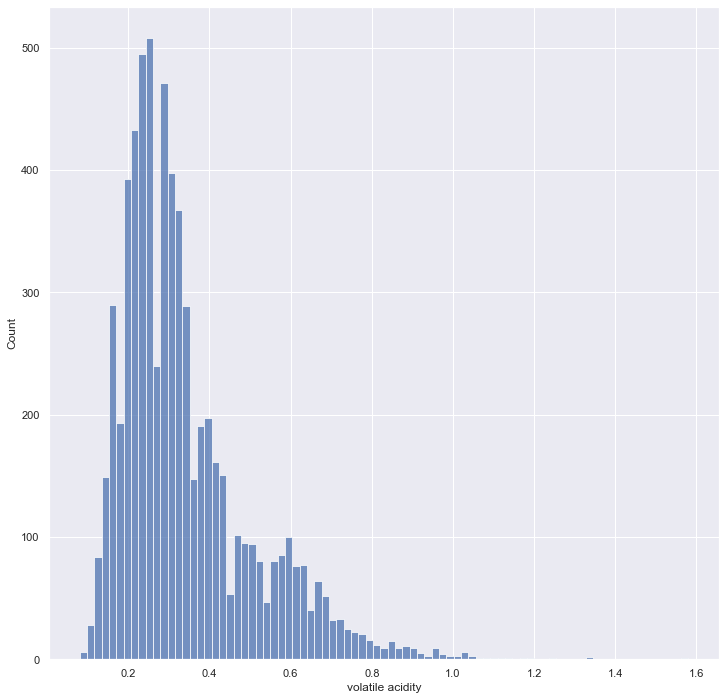

In [39]:
# better: sns
sns.histplot(wine['volatile acidity'])

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

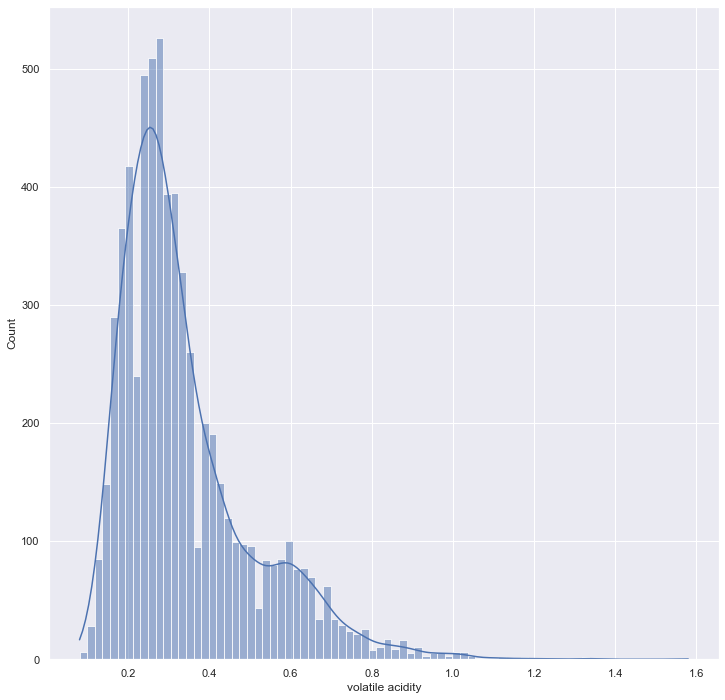

In [41]:
# even better: sns with kde and better binning
sns.histplot(wine['volatile acidity'], kde=True, bins=int(np.sqrt(len(wine))))

Now the distribution looks quite different. There seems to be a small second peak around 0.6. And we can reproduce this if we check out `seaborn`'s kernel density plot.

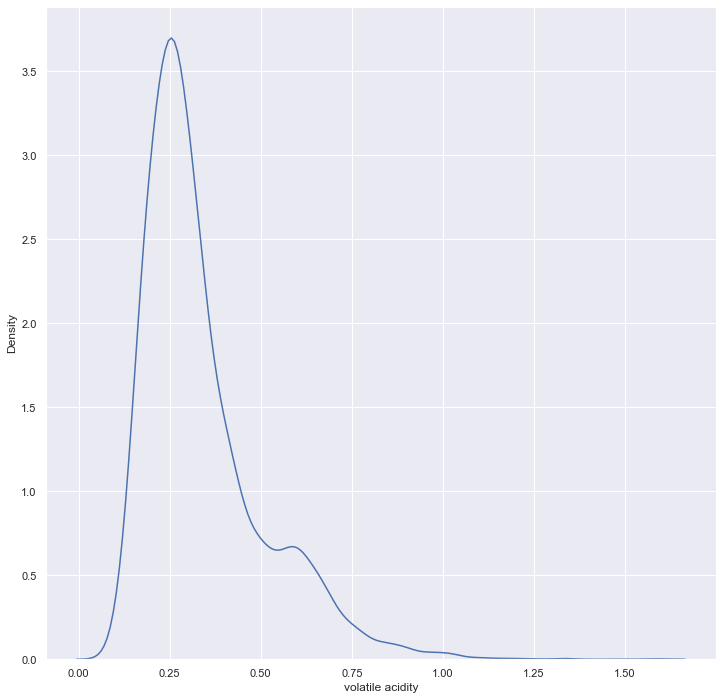

In [42]:
sns.kdeplot(wine['volatile acidity']);

So suppose we build a new feature that records whether a wine's volatile acidity is above 0.5.

In [43]:
# new feature!

wine['high_va'] = wine['volatile acidity'] > .5


In [44]:
# Correlation?
wine_corrs = wine.corr()['quality'].map(abs).sort_values(ascending=False)
wine_corrs

quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
high_va                 0.212391
chlorides               0.200666
red_wine                0.119323
citric acid             0.085532
fixed acidity           0.076743
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64

Not bad! We don't seem to have stumbled onto a huge connection here, but this correlation value suggests that this new feature may be helpful in a final model.

### $\bf{SO_2}$

Next we'll take a look at distribution of the sulfur dioxide feature:

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Count'>

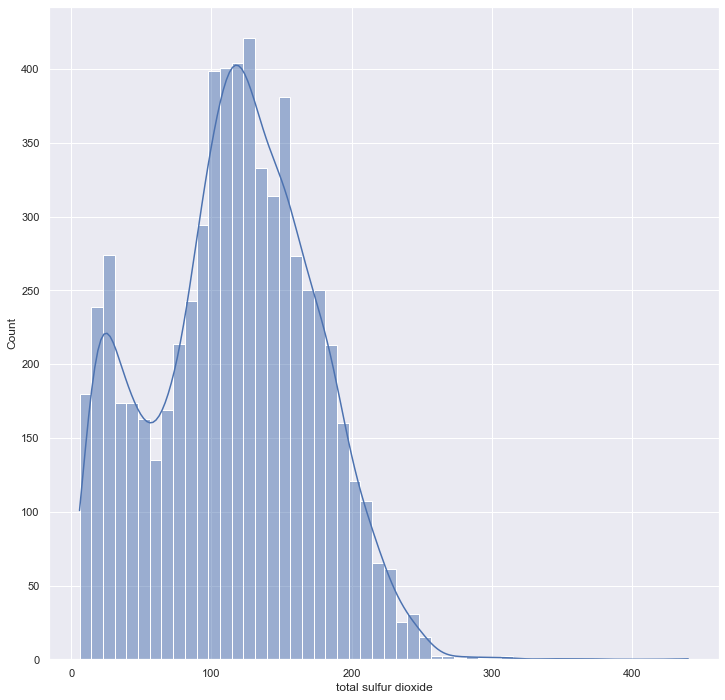

In [45]:
sns.histplot(wine['total sulfur dioxide'], kde=True)

Let's try separating our wines into those with sulfur dioxide higher than 80 and those with less:

In [46]:
wine['high_so2'] = wine['total sulfur dioxide'] > 80

In [47]:
wine.corr()['quality']['high_so2']

0.08074521567591902

Not great. Perhaps this is a modeling dead end.

## Products of Features

Another engineering strategy we might try is **multiplying features together**.

Let's try these two features: `residual sugar` and `total sulfur dioxide`. Note that without domain knowledge or exploration, this is really a guess that this combination will predict `quality` well.

In [48]:
# mulitply?
wine['rs*tds'] = wine['residual sugar'] * wine['total sulfur dioxide']

In [49]:
# check it
wine_corrs = wine.corr()['quality'].map(abs).sort_values(ascending=False)
wine_corrs

quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
high_va                 0.212391
chlorides               0.200666
red_wine                0.119323
citric acid             0.085532
high_so2                0.080745
fixed acidity           0.076743
rs*tds                  0.066228
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64

In [50]:
wine.corr()['quality']['residual sugar']

-0.03698048458576987

In [51]:
wine.corr()['quality']['total sulfur dioxide']

-0.04138545385560974

We can see these two features together have a higher correlation than each by itself!

## Polynomial Features

Instead of just multiplying features at random, we might consider trying **every possible product of features**. That's what PolynomialFeatures does:

In [62]:
# Polynomials!
pf = PolynomialFeatures(degree=3)

X = wine.drop('quality', axis= 1)
y = wine.quality

In [63]:
pf.fit(X)

PolynomialFeatures(degree=3)

In [55]:
# Create Dataframe
pf.get_feature_names_out()

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'red_wine', 'high_va', 'high_so2', 'rs*tds', 'fixed acidity^2',
       'fixed acidity volatile acidity', 'fixed acidity citric acid',
       'fixed acidity residual sugar', 'fixed acidity chlorides',
       'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'fixed acidity red_wine',
       'fixed acidity high_va', 'fixed acidity high_so2',
       'fixed acidity rs*tds', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity 

In [64]:
pfd = pd.DataFrame(pf.transform(X), columns = pf.get_feature_names_out())

In [65]:
pfd.shape

(6497, 816)

In [66]:
# Get example

matching = [s for s in pfd.columns if "citric" in s]

In [69]:
import sklearn
sklearn.__version__

'1.2.2'

In [67]:
matching

['citric acid',
 'fixed acidity citric acid',
 'volatile acidity citric acid',
 'citric acid^2',
 'citric acid residual sugar',
 'citric acid chlorides',
 'citric acid free sulfur dioxide',
 'citric acid total sulfur dioxide',
 'citric acid density',
 'citric acid pH',
 'citric acid sulphates',
 'citric acid alcohol',
 'citric acid red_wine',
 'citric acid high_va',
 'citric acid high_so2',
 'citric acid rs*tds',
 'fixed acidity^2 citric acid',
 'fixed acidity volatile acidity citric acid',
 'fixed acidity citric acid^2',
 'fixed acidity citric acid residual sugar',
 'fixed acidity citric acid chlorides',
 'fixed acidity citric acid free sulfur dioxide',
 'fixed acidity citric acid total sulfur dioxide',
 'fixed acidity citric acid density',
 'fixed acidity citric acid pH',
 'fixed acidity citric acid sulphates',
 'fixed acidity citric acid alcohol',
 'fixed acidity citric acid red_wine',
 'fixed acidity citric acid high_va',
 'fixed acidity citric acid high_so2',
 'fixed acidity citri

In [70]:
# Model it!
lr = LinearRegression()

In [76]:
lr.fit(pfd,y)

LinearRegression()

In [77]:
# Score it!
lr.score(pfd,y)

0.5071901940044611

In [78]:
pfmodel = sm.OLS(y, sm.add_constant(pfd)).fit()

In [79]:
pfmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     11.26
Date:                Tue, 19 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:44:14   Log-Likelihood:                -6055.8
No. Observations:                6497   AIC:                         1.319e+04
Df Residuals:                    5957   BIC:                         1.685e+04
Df Model:                         539                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
1                                                            -7.0699    124.733     -0.057      0.955    -251.593     237.453
fixed acidity                                              -117.5860    164.177     -0.716      0.474    -439.433     204.261
volatile acidity                                             26.0606     43.039      0.606      0.545     -58.310     110.432
citric acid                                                 -12.3877     31.992     -0.387      0.699     -75.104      50.328
residual sugar                                              331.1953    201.811      1.641      0.101     -64.428     726.818
chlorides                                                  -168.9662    175.980     -0.960      0.337    -513.952     176.019
free sulfur dioxide                                         -23.4425     28.420     -0.825      0.409     -79.156      32.271
total sulfur dioxide                                        -64.6746     36.911     -1.752      0.080    -137.033       7.684
density                                                      12.6095     39.860      0.316      0.752     -65.530      90.749
pH                                                           90.6761     87.282      1.039      0.299     -80.428     261.781
sulphates                                                   -42.5136     31.455     -1.352      0.177    -104.177      19.150
alcohol                                                     121.1068    130.879      0.925      0.355    -135.463     377.676
red_wine                                                   -110.5921     55.394     -1.996      0.046    -219.185      -2.000
high_va                                                      16.0843     49.508      0.325      0.745     -80.970     113.138
high_so2                                                     19.1311     37.596      0.509      0.611     -54.571      92.833
rs*tds                                                       -1.2819      8.295     -0.155      0.877     -17.543      14.979
fixed acidity^2                                               7.0506      8.154      0.865      0.387      -8.934      23.035
fixed acidity volatile acidity                               77.4246    131.620      0.588      0.556    -180.598     335.447
fixed acidity citric acid                                   -30.8732     98.296     -0.314      0.753    -223.569     161.823
fixed acidity residual sugar                                -14.1054     17.291     -0.816      0.415     -48.002      19.791
fixed acidity chlorides                                      33.3053     76.736      0.434      0.664    -117.124     183.735
fixed acidity free sulfur dioxide                          

So: Is this a good idea? What are the potential dangers here?

## Exercise

Consider the following dataset:

In [80]:
sales = pd.read_csv('data/Advertising.csv', index_col=0)

sales.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


We'd like to try to understand sales as a function of spending on various media (TV, radio, newspaper).

In [82]:
sales.corr()['sales']

TV           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
Name: sales, dtype: float64

**Try to find the best multiplicative combination of features.**

You may use `PolynomialFeatures` or just multiply by hand.

In practice, it's not easy to tell when such products of features will be so fruitful. Moreover, there is room for concern about violating regression's demand for feature independence. At the very least, we would probably not want to include a product *and the individual features themselves* in a final model, not if our goal is to understand what's really responsible for fluctuations in our target variable.

In [84]:
import scipy
print(scipy.__version__)
import numpy
print(numpy.__version__)
import sklearn
print(sklearn.__version__)

1.5.0
1.22.0
1.2.2
